<a href="https://colab.research.google.com/github/Sid-Oya/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Sidoney_Daley_LS_DS_112_Make_Features_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [0]:
##### Begin Working Here #####
import pandas as pd
import numpy as np


In [0]:
url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv'

In [0]:
iowa = pd.read_csv(url)


In [0]:
# pull a few rows to see how data is presented
iowa.sample(10)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
317,318,60,FV,75.0,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1088,1088,GasA,...,Y,SBrkr,1088,871,0,1959,0,0,2,1,3,1,Gd,8,Typ,1,Gd,Attchd,2006.0,RFn,3,1025,TA,TA,Y,208,46,0,0,0,0,NaN,NaN,NaN,0,12,2007,WD,Normal,270000
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,5,1971,2002,Gable,CompShg,Plywood,Plywood,Stone,351.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,1219,Unf,0,424,1643,GasA,...,Y,SBrkr,1824,0,0,1824,1,0,2,0,2,1,Gd,5,Typ,2,TA,Attchd,1971.0,Unf,2,739,TA,TA,Y,380,48,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000
690,691,120,RM,NaN,4426,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,TwnhsE,1Story,6,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,147.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,697,Unf,0,151,848,GasA,...,Y,SBrkr,848,0,0,848,1,0,1,0,1,1,Gd,3,Typ,1,TA,Attchd,2004.0,RFn,2,420,TA,TA,Y,149,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,141000
945,946,50,RM,98.0,8820,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,5,6,1890,1996,Hip,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,BrkTil,TA,TA,No,LwQ,1088,Unf,0,0,1088,GasA,...,Y,SBrkr,1188,561,120,1869,0,0,1,0,2,1,TA,7,Typ,0,NaN,Detchd,1963.0,Unf,2,456,TA,TA,Y,48,0,244,0,0,0,NaN,MnWw,NaN,0,9,2009,WD,Normal,124900
136,137,20,RL,NaN,10355,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,BrkFace,196.0,TA,TA,CBlock,TA,TA,No,BLQ,695,Unf,0,519,1214,GasA,...,Y,SBrkr,1214,0,0,1214,0,0,2,0,3,1,TA,5,Typ,1,Fa,Attchd,1967.0,RFn,1,318,TA,TA,Y,0,111,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal,143000
1432,1433,30,RL,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,4,6,1927,2007,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,656,656,GasA,...,Y,SBrkr,968,0,0,968,0,0,2,0,4,1,TA,5,Typ,0,NaN,Detchd,1928.0,Unf,1,216,Fa,Fa,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,64500
1036,1037,20,RL,89.0,12898,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,9,5,2007,2008,Hip,CompShg,VinylSd,VinylSd,Stone,70.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1022,Unf,0,598,1620,GasA,...,Y,SBrkr,1620,0,0,1620,1,0,2,0,2,1,Ex,6,Typ,1,Ex,Attchd,2008.0,Fin,3,912,TA,TA,Y,228,0,0,0,0,0,NaN,NaN,NaN,0,9,2009,WD,Normal,315500
645,646,20,RL,NaN,10530,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1971,1971,Hip,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,282,LwQ,35,664,981,GasA,...,Y,SBrkr,981,0,0,981,1,0,1,1,3,1,TA,5,Typ,0,NaN,Detchd,1979.0,Unf,2,576,TA,TA,Y,0,312,40,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal,143250
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,PosA,1Fam,2.5Unf,10,9,1893,2000,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Ex,Ex,BrkTil,TA,TA,No,Unf,0,Unf,0,1237,1237,GasA,...,Y,SBrkr,1521,1254,0,2775,0,0,3,1,3,1,Gd,9,Typ,1,Gd,Detchd,1988.0,Unf,2,880,Gd,TA,Y,105,502,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
847,848,20,RL,36.0,15523,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,6,1972,1972,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Av,BLQ,460,U

In [0]:
# how many rows and columns in entire dataset
iowa.shape

(1460, 81)

In [0]:
# get information on specific columns using - describe
iowa[['YearBuilt', 'MSSubClass']].describe()

,YearBuilt,MSSubClass
count,1460.000000,1460.000000
mean,1971.267808,56.897260
std,30.202904,42.300571
min,1872.000000,20.000000
25%,1954.000000,20.000000
50%,1973.000000,50.000000
75%,2000.000000,70.000000
max,2010.000000,190.000000


In [0]:
# see the data type on specific columns,  will look at the data type in the first 4 columns (sample set up to row 99)
pd.set_option('display.max_rows', 100)
iowa.dtypes[:4]

Id               int64
MSSubClass       int64
MSZoning        object
LotFrontage    float64
dtype: object

In [0]:
# for information about the data type of a specific column
iowa['BedroomAbvGr'].dtype

dtype('int64')

In [0]:
# another way to call columns is the dot method but it is not recommended
iowa.Fireplaces.sample(4)

459     1
1404    0
992     1
1072    1
Name: Fireplaces, dtype: int64

In [0]:
# the preferred method
iowa['Fireplaces'].sample(4)

548     0
1418    0
1151    2
835     0
Name: Fireplaces, dtype: int64

In [0]:
# calling more than one column
iowa[['Fireplaces', 'BedroomAbvGr']].sample(4)


,Fireplaces,BedroomAbvGr
1289,1,3
754,0,3
262,1,3
830,2,3


In [0]:
# looking at the first ten rows of the LotFrontage column.    # why are these intergers formatted at floats?
iowa['LotFrontage'].head()

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64

In [0]:
# why are these intergers formatted at floats?  lets investigate  lets see all the possible values of the LotFrontage column  
# dropna is equal to False to see if there are values that holds NaN value
# NaN stand for not a number - values in a set will be converted to a float to accomandate NaN values
iowa['LotFrontage'].value_counts(dropna=False)

NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 111, dtype: int64

In [0]:
np.nan
# what is the data type of NaN.  Pandas likes data types within a column to be uniformed.
type(np.nan)

float

In [0]:
# now that there are NaN - not a number values in the LotFrontage column lets check to see how much data is missing
iowa['LotFrontage'].isnull().sum()

259

In [0]:
#lets recheck how big the iowa data set is
iowa.shape

(1460, 81)

In [0]:
# lets drop (delete) the missing data in the LotFrontage column (259)
iowa['LotFrontage'].dropna(inplace=True)

In [0]:
# now lets check to see if the missing data was dropped 
iowa['LotFrontage'].isnull().sum()


0

In [0]:
# Making New Features - making a new dataframe using data from the original data set
# selecting a few columns 
# new data frame is called small - takes copy of specific columns from iowa
# taking a sample of the new data frame called small
small=iowa[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'SalePrice']].copy()
small.sample(3)

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice
416,672,672,728,149500
808,1024,1086,0,159950
493,1269,1269,0,155000


In [0]:
#syntax for creating new columns 
#new column value based on existing data set 
# must use square bracket syntax
# lets create a total square footage column within the new dataframe called small

small['TotalSF'] = small['TotalBsmtSF'] + small ['1stFlrSF'] + small ['2ndFlrSF']
small.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSF
0,856,856,854,208500,2566
1,1262,1262,0,181500,2524
2,920,920,866,223500,2706
3,756,961,756,140000,2473
4,1145,1145,1053,250000,3343


In [0]:
# lets create another column for the small dataframe
# PricePerSgFt = price divided by square footage

small['PricePerSgFt'] = small['SalePrice'] / small['TotalSF']
small.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSF,PricePerSgFt
0,856,856,854,208500,2566,81.254871
1,1262,1262,0,181500,2524,71.909667
2,920,920,866,223500,2706,82.594235
3,756,961,756,140000,2473,56.611403
4,1145,1145,1053,250000,3343,74.783129


In [0]:
small.sample(5)

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSF,PricePerSgFt
291,780,936,780,135900,2496,54.447115
917,1134,1229,0,135000,2363,57.130766
625,1116,1116,0,160000,2232,71.684588
1171,1261,1261,0,163000,2522,64.631245
1331,911,954,0,132500,1865,71.045576


In [0]:
# crosstabs - used to build a summary table - builds a cross-tabulation table that can show the fequency in which certain groups of data appear
# focus on categorical
# name all the columns in iowa data set

iowa.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [0]:
# select some columns an sample
iowa[['LotShape', 'Alley', 'Street', 'SaleCondition']].sample(5)

,LotShape,Alley,Street,SaleCondition
542,Reg,NaN,Pave,Normal
1302,Reg,NaN,Pave,Normal
555,Reg,NaN,Pave,Normal
15,Reg,NaN,Pave,Normal
674,Reg,NaN,Pave,Normal


In [0]:
# lets look at sale condition and see how the value and the correlating amount
# values of sale condition

iowa['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [0]:
# lets create a new categorial variable (cannot perform numerical operation)
# the new categorical will be NormalCondition  within SaleCondition it which a condition is normal == true & anything other == false

In [0]:
iowa['NormalCondition'] = np.where(iowa['SaleCondition']=='Normal', 1, 0)
iowa['NormalCondition'].value_counts()

1    1198
0     262
Name: NormalCondition, dtype: int64

In [0]:
# value counts of a categorical value
# lets take a look at the categorical value 'LotShape' and see its value counts
iowa['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [0]:
# Map the categorical value 'LotShape' to change the values from 4 to 3 - essential recategorizing the values and counts
# will name this new variable 'LotShape3'

iowa['LotShape3'] = iowa['LotShape'].map({'Reg': 'Regular', 'IR1' : 'Irregual', 'IR2': 'Other', 'IR3': 'Other'})
iowa['LotShape3'].value_counts()

Regular     925
Irregual    484
Other        51
Name: LotShape3, dtype: int64

In [0]:
# lets take the value count of another categorical variable
# lets analyze 'Neighborhood'

iowa['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [0]:
# one more way to map categorical variables
# replace using .loc
# Lets manipulate 'Neighborhood' lets say we just want to foucs on the top 5 largest neighborhoods and list the others under all others
# 1st lets create the variable 'top_neighbors'

iowa['top_neighbors'] = 'All Others'
iowa[['top_neighbors', 'Neighborhood']].head()

,top_neighbors,Neighborhood
0,All Others,CollgCr
1,All Others,Veenker
2,All Others,CollgCr
3,All Others,Crawfor
4,All Others,NoRidge


In [0]:
# 2nd remap just the ones we want using ising.loc

iowa.loc[iowa['Neighborhood'] == 'NAmes', 'top_neighbors'] = 'North Ames'
iowa[['top_neighbors', 'Neighborhood']].sample(10)

,top_neighbors,Neighborhood
1157,All Others,NridgHt
394,All Others,OldTown
1109,All Others,NridgHt
985,All Others,Edwards
213,All Others,CollgCr
986,All Others,OldTown
1249,North Ames,NAmes
1120,All Others,IDOTRR
1193,All Others,Mitchel
205,All Others,Gilbert


In [0]:
# lets do this multiple types for other top neigborhoods

iowa.loc[iowa['Neighborhood']=='CollgCr', 'top_neighbors']='College Circle'
iowa.loc[iowa['Neighborhood']== 'Gilbert', 'top_neighbors']='Favorite Neighborhood'
iowa.loc[iowa['Neighborhood']== 'Somerst', 'top_neighbors']= 'Favorite Neighborhood'
iowa[['top_neighbors', 'Neighborhood']].sample(10)

,top_neighbors,Neighborhood
631,All Others,NridgHt
1270,All Others,ClearCr
418,All Others,Edwards
649,All Others,MeadowV
142,North Ames,NAmes
1034,All Others,Crawfor
425,All Others,OldTown
1109,All Others,NridgHt
1385,All Others,IDOTRR
1013,All Others,OldTown


In [0]:
#lets check work

iowa['top_neighbors'].value_counts()

All Others               920
North Ames               225
Favorite Neighborhood    165
College Circle           150
Name: top_neighbors, dtype: int64

In [0]:
# crosstabs - used to build a summary table - builds a cross-tabulation table that can show the fequency in which certain groups of data appear
# lets do a crosstab of 'top_neighbors' and 'LotShape3'

pd.crosstab(iowa['top_neighbors'], iowa['LotShape3'])

LotShape3,Irregual,Other,Regular
top_neighbors,,,
All Others,294,23,603
College Circle,53,11,86
Favorite Neighborhood,71,15,79
North Ames,66,2,157


In [0]:
# margins - x-axis and y-axis limits
pd.crosstab(iowa['top_neighbors'], iowa['LotShape3'], margins=True)

LotShape3,Irregual,Other,Regular,All
top_neighbors,,,,
All Others,294,23,603,920
College Circle,53,11,86,150
Favorite Neighborhood,71,15,79,165
North Ames,66,2,157,225
All,484,51,925,1460


In [0]:
# use proportions (parts of 1 or percentage of 100) to view the margins

pd.crosstab(iowa['top_neighbors'], iowa['LotShape3'], normalize='index', margins=True)

LotShape3,Irregual,Other,Regular
top_neighbors,,,
All Others,0.319565,0.025000,0.655435
College Circle,0.353333,0.073333,0.573333
Favorite Neighborhood,0.430303,0.090909,0.478788
North Ames,0.293333,0.008889,0.697778
All,0.331507,0.034932,0.633562


In [0]:
pd.crosstab(iowa['top_neighbors'], iowa['LotShape3'], normalize='columns', margins=True)

LotShape3,Irregual,Other,Regular,All
top_neighbors,,,,
All Others,0.607438,0.450980,0.651892,0.630137
College Circle,0.109504,0.215686,0.092973,0.102740
Favorite Neighborhood,0.146694,0.294118,0.085405,0.113014
North Ames,0.136364,0.039216,0.169730,0.154110


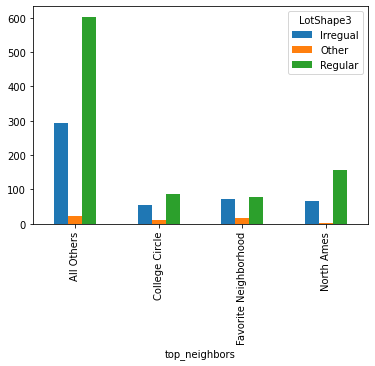

In [0]:
# lets display this crosstab in a bar graph

myresults = pd.crosstab(iowa['top_neighbors'], iowa['LotShape3'])
myresults.plot(kind='bar');

In [0]:
# lets do another crosstab

pd.crosstab(iowa['OverallQual'], iowa['top_neighbors'])

top_neighbors,All Others,College Circle,Favorite Neighborhood,North Ames
OverallQual,,,,
1,2,0,0,0
2,3,0,0,0
3,17,0,0,3
4,94,1,1,20
5,253,28,3,113
6,232,24,44,74
7,159,71,77,12
8,108,23,34,3
9,35,3,5,0


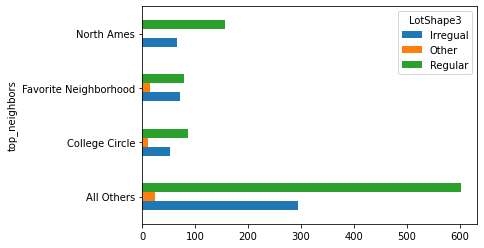

In [0]:
# lets display this crosstab in a horizontal bar graph

myresults.plot(kind='barh');

# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01